## The conundrum: 
CAM and CLM treat reference heights *very* differently when computing zeta (a dimensionless height used in Monin-Obukhov theory): 


**CLM:** 
$$ \zeta = \frac{z-d}{L}  $$
<br>
$$ L = -\frac{u_*^3}{k(\frac{1}{\theta_{v,atm}})gQ_0} $$
<br>
<br>

**CAM:**
$$ \zeta = \frac{z_{const}}{L}  $$
<br>
$$ L = -\frac{u_*^3}{k(\frac{1}{T_0})gQ_0} $$
<br>
$$ z_{const} = 1 m $$
$$ T_0 = 300 K $$

### Why would that matter? 
The calculation of surface moments in CLUBB depends on zeta. For example: 
\begin{equation}
\overline{w'^2} = 
\begin{cases}
u_*^2\left[1.75 + 2\left(-\zeta\right)^{\frac{2}{3}}\right],\,\,\zeta < 0\\
1.75u_*^2,\,\,\zeta > 0
\end{cases}
\end{equation}

\begin{equation}
\overline{\theta'^2} = 
\begin{cases}
\frac{Q_0^2}{u_*^2}(4(1-8.3\zeta)^{-2/3}),\,\,\zeta < 0\\
\frac{Q_0^2}{u_*^2}(4),\,\,\zeta > 0
\end{cases}
\end{equation}

\begin{equation}
\overline{q'^2} = 
\begin{cases}
\frac{H_0^2}{u_*^2}(4(1-8.3\zeta)^{-2/3}),\,\,\zeta < 0\\
\frac{H_0^2}{u_*^2}(4),\,\,\zeta > 0
\end{cases}
\end{equation}



So a vastly different value of zeta means a vastly different surface moment depending on if it's computed in CLUBB or in CLM (as we want to do in the CLASP project).

## Problem illustration: 

Ran a series of SCAM simulations at the ARM SGP site, but to simplify things the surface is modified to be just a single PFT, bare ground. When CLM has a bare ground patch, its calculation of zeta depends only on the reference height, not on any measure of rougness or displacement.


In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import xarray as xr
import pandas as pd


**Read in data**

In [2]:
## Read in history and log files (scm_iop_land_srf = .false.)
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/ZetaIssue/'

zconst32p5_camDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst32p5_useAndre-64levs.SrfMod-BareGroundOnly.cam.h0.2015-05-31-00000.nc', decode_times=True)
zconst32p5_clmDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst32p5_useAndre-64levs.SrfMod-BareGroundOnly.clm2.h0.2015-05-31-00000.nc', decode_times=True)

with open(dataDir+'FSCAM.T42_T42.arm97.Zconst32p5_useAndre-64levs.SrfMod-BareGroundOnly_atmLog') as f:
    zconst32p5_atmLog = f.readlines()
with open(dataDir+'FSCAM.T42_T42.arm97.Zconst32p5_useAndre-64levs.SrfMod-BareGroundOnly_lndLog') as f:
    zconst32p5_lndLog = f.readlines()

zconst1_camDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.cam.h0.2015-05-31-00000.nc', decode_times=True)
zconst1_clmDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.clm2.h0.2015-05-31-00000.nc', decode_times=True)

with open(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnl_atmLog') as f:
    zconst1_atmLog = f.readlines()
with open(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnl_lndLog') as f:
    zconst1_lndLog = f.readlines()


In [2]:
# ## Read in history and log files (scm_iop_land_srf = .true.)
# dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/ZetaIssue/'

# zconst32p5_camDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst32_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf.cam.h0.2015-05-31-00000.nc', decode_times=True)
# zconst32p5_clmDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst32_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf.clm2.h0.2015-05-31-00000.nc', decode_times=True)

# with open(dataDir+'FSCAM.T42_T42.arm97.Zconst32_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf_atmLog') as f:
#     zconst32p5_atmLog = f.readlines()
# with open(dataDir+'FSCAM.T42_T42.arm97.Zconst32_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf_lndLog') as f:
#     zconst32p5_lndLog = f.readlines()

# zconst1_camDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf.cam.h0.2015-05-31-00000.nc', decode_times=True)
# zconst1_clmDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf.clm2.h0.2015-05-31-00000.nc', decode_times=True)

# with open(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf_atmLog') as f:
#     zconst1_atmLog = f.readlines()
# with open(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf_lndLog') as f:
#     zconst1_lndLog = f.readlines()



In [3]:
## Go through log files to pull out data not already saved out: 
## -------------------------------------------------------------

# First get where each output for a timestep ends

endTimeLines_atm32p5 = []
for iLines in range(len(zconst32p5_atmLog)):
    if zconst32p5_atmLog[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines_atm32p5 = np.append(endTimeLines_atm32p5,iLines)
        
endTimeLines_atm1 = []
for iLines in range(len(zconst1_atmLog)):
    if zconst1_atmLog[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines_atm1 = np.append(endTimeLines_atm1,iLines)

endTimeLines_lnd1 = []
for iLines in range(len(zconst1_lndLog)):
    if zconst1_lndLog[iLines].startswith(' clm: completed timestep  ')==True:
        endTimeLines_lnd1 = np.append(endTimeLines_lnd1,iLines)

endTimeLines_lnd32p5 = []
for iLines in range(len(zconst32p5_lndLog)):
    if zconst32p5_lndLog[iLines].startswith(' clm: completed timestep  ')==True:
        endTimeLines_lnd32p5 = np.append(endTimeLines_lnd32p5,iLines)
     
        
# Now get the last value of zeta and zldis in CAM and CLM files per timestep:
clubb_zeta_32p5 = []
clubb_zeta_1    = []
clm_zldis_32p5  = []
clm_zldis_1     = []

for iTimes in range(len(endTimeLines_atm1)):
    if iTimes==0: 
        timestepSection_atm32p5 = zconst32p5_atmLog[0:int(endTimeLines_atm32p5[iTimes])]
        timestepSection_atm1    = zconst1_atmLog[0:int(endTimeLines_atm1[iTimes])]
        timestepSection_lnd32p5 = zconst32p5_lndLog[0:int(endTimeLines_lnd32p5[iTimes])]
        timestepSection_lnd1    = zconst1_lndLog[0:int(endTimeLines_lnd1[iTimes])]
        
    else:
        timestepSection_atm32p5 = zconst32p5_atmLog[int(endTimeLines_atm32p5[iTimes-1]):int(endTimeLines_atm32p5[iTimes])]
        timestepSection_atm1    = zconst1_atmLog[int(endTimeLines_atm1[iTimes-1]):int(endTimeLines_atm1[iTimes])]
        timestepSection_lnd32p5 = zconst32p5_lndLog[int(endTimeLines_lnd32p5[iTimes-1]):int(endTimeLines_lnd32p5[iTimes])]
        timestepSection_lnd1    = zconst1_lndLog[int(endTimeLines_lnd1[iTimes-1]):int(endTimeLines_lnd1[iTimes])]
        
    lineZeta_32p5   = [item for item in timestepSection_atm32p5 if item.startswith(' MDF:   CLUBB Value of zeta  =')]
    strArr          = lineZeta_32p5[-1].split('=')
    zeta32          = strArr[1].split('\n')
    clubb_zeta_32p5 = np.append(clubb_zeta_32p5, float(zeta32[0]))

    lineZeta_1      = [item for item in timestepSection_atm1 if item.startswith(' MDF:   CLUBB Value of zeta  =')]
    strArr          = lineZeta_1[-1].split('=')
    zeta1           = strArr[1].split('\n')
    clubb_zeta_1    = np.append(clubb_zeta_1, float(zeta1[0]))


    lineZldis_32p5  = [item for item in timestepSection_lnd32p5 if item.startswith(' MDF:  Value of zldis (patch):')]
    strArr          = lineZldis_32p5[-1].split(':')
    zldis32         = strArr[2].split('\n')
    clm_zldis_32p5  = np.append(clm_zldis_32p5, float(zldis32[0]))

    lineZldis_1     = [item for item in timestepSection_lnd1 if item.startswith(' MDF:  Value of zldis (patch):')]
    strArr          = lineZldis_1[-1].split(':')
    zldis1          = strArr[2].split('\n')
    clm_zldis_1     = np.append(clm_zldis_1, float(zldis1[0]))   


In [4]:
# Get time array 
zconst32p5_camDS['time']  = zconst32p5_camDS.indexes['time'].to_datetimeindex()
times      = pd.DatetimeIndex(zconst32p5_camDS['time'].values,tz='UTC')


<ipython-input-4-537d865859af>:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  zconst32p5_camDS['time']  = zconst32p5_camDS.indexes['time'].to_datetimeindex()


### The default setting of z_const results in a dramatically different (smaller) value of zeta compared to what's used in CLM.


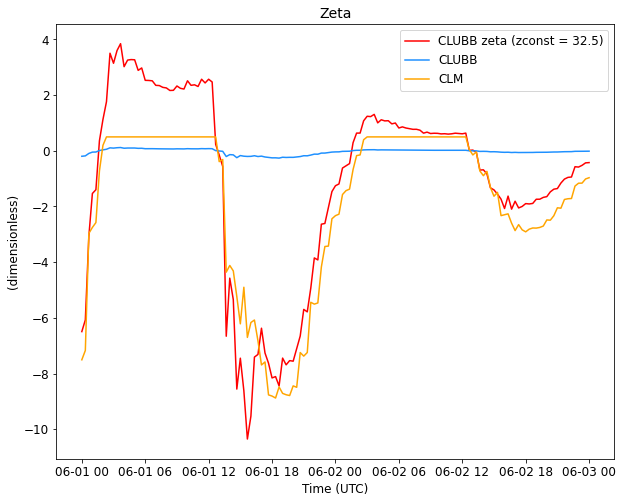

In [5]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times[72::],clubb_zeta_32p5[72::],'r',label='CLUBB zeta (zconst = 32.5)')
ax1.plot(times[72::],clubb_zeta_1[72::],'dodgerblue',label='CLUBB')
# ax1.plot(times[72::],np.squeeze(zconst32p5_clmDS.ZETA.values)[72::],'orange',label='CLM (CLUBB zconst = 32.5)')
ax1.plot(times[72::],np.squeeze(zconst1_clmDS.ZETA.values)[72::],'orange',label='CLM')
ax1.legend(fontsize=12)
ax1.set_title('Zeta',fontsize=14)
ax1.set_ylabel('(dimensionless)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)



Text(0.5, 0, 'Time (UTC)')

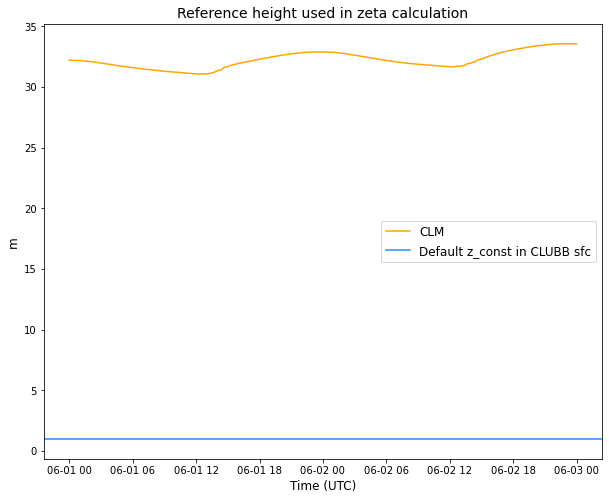

In [6]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

#ax1.plot(times,clm_zldis_32p5,'g',label='CLM (32.5m z_const in CLUBB)')
ax1.plot(times[72::],clm_zldis_1[72::],'orange',label='CLM')
ax1.axhline(1,color='dodgerblue',label='Default z_const in CLUBB sfc')
ax1.legend(fontsize=12)
ax1.set_title('Reference height used in zeta calculation',fontsize=14)
ax1.set_ylabel('m',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)


Text(0.5, 0, 'Time (UTC)')

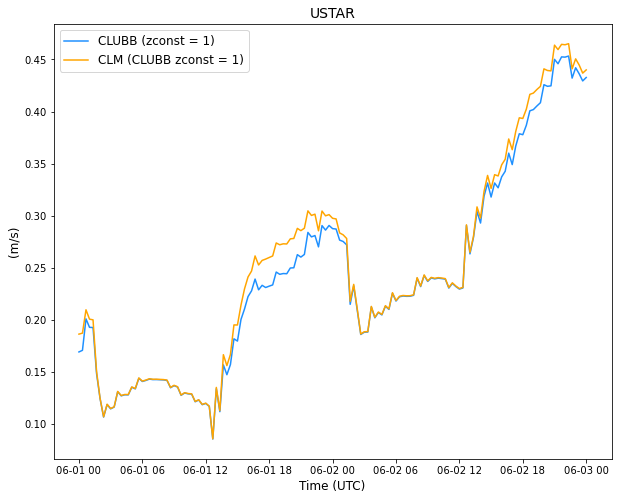

In [7]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

# ax1.plot(times[72::],np.squeeze(zconst32p5_camDS.USTAR.values)[72::],'r',label='CLUBB zeta (zconst = 32.5)')
ax1.plot(times[72::],np.squeeze(zconst1_camDS.USTAR.values)[72::],'dodgerblue',label='CLUBB (zconst = 1)')
# ax1.plot(times[72::],np.squeeze(zconst32p5_clmDS.USTAR.values)[72::],'g',label='CLM (CLUBB zconst = 32.5)')
ax1.plot(times[72::],np.squeeze(zconst1_clmDS.USTAR.values)[72::],'orange',label='CLM (CLUBB zconst = 1)')
ax1.legend(fontsize=12)
ax1.set_title('USTAR',fontsize=14)
ax1.set_ylabel('(m/s)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)




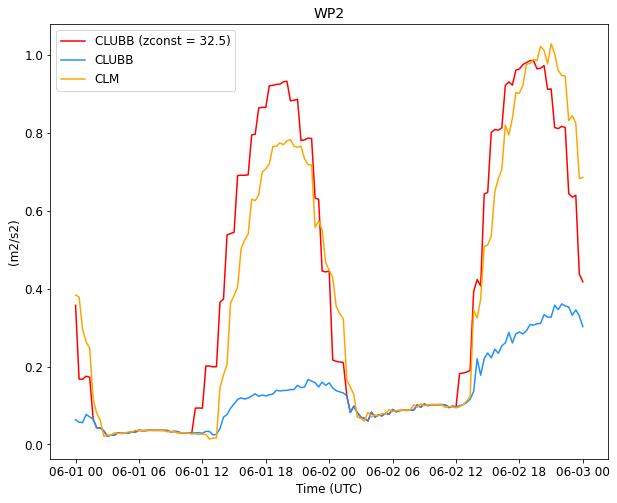

In [6]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times[72::],np.squeeze(zconst32p5_camDS.WP2_CLUBB.values)[72::,-1],'red',label='CLUBB (zconst = 32.5)')
ax1.plot(times[72::],np.squeeze(zconst1_camDS.WP2_CLUBB.values)[72::,-1],'dodgerblue',label='CLUBB')
ax1.plot(times[72::],np.squeeze(zconst32p5_clmDS.WP2_CLUBB.values)[72::],'orange',label='CLM')
# ax1.plot(times[72::],np.squeeze(zconst1_clmDS.WP2_CLUBB.values)[72::],'orange',label='CLM')

ax1.legend(fontsize=12)
ax1.set_title('WP2',fontsize=14)
ax1.set_ylabel('(m2/s2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)

ax1.tick_params(axis='both', which='major', labelsize=12)


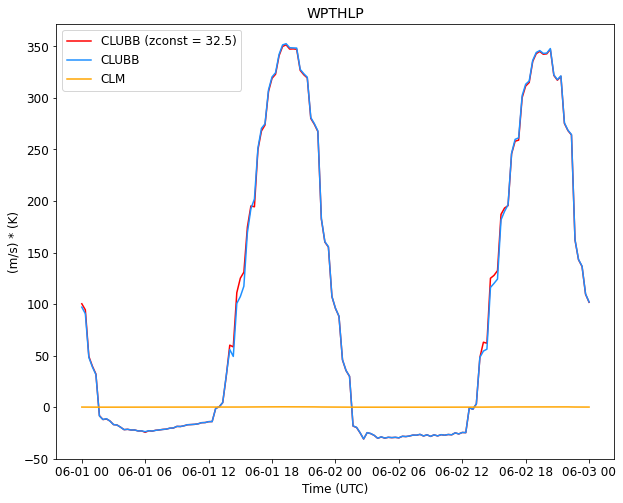

In [32]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times[72::],np.squeeze(zconst32p5_camDS.WPTHLP_CLUBB.values)[72::,-1],'red',label='CLUBB (zconst = 32.5)')
ax1.plot(times[72::],np.squeeze(zconst1_camDS.WPTHLP_CLUBB.values)[72::,-1],'dodgerblue',label='CLUBB')
ax1.plot(times[72::],np.squeeze(zconst32p5_clmDS.WPTHLP_CLUBB.values)[72::],'orange',label='CLM')
# ax1.plot(times[72::],np.squeeze(zconst1_clmDS.WP2_CLUBB.values)[72::],'orange',label='CLM')

ax1.legend(fontsize=12)
ax1.set_title('WPTHLP',fontsize=14)
ax1.set_ylabel('(m/s) * (K)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)

ax1.tick_params(axis='both', which='major', labelsize=12)



In [8]:
reduce_coef = 0.2

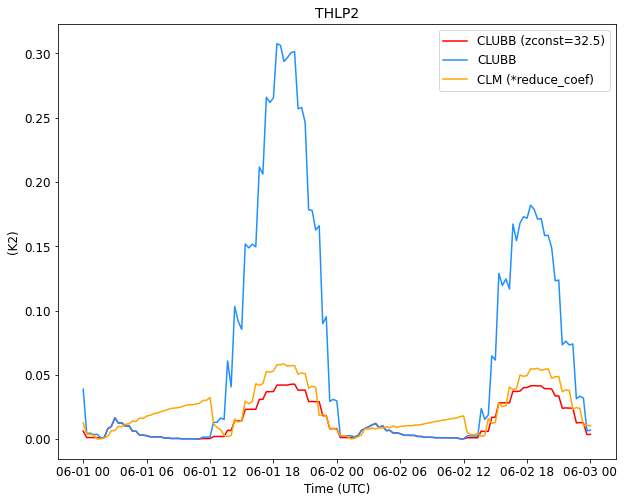

In [9]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times[72::],np.squeeze(zconst32p5_camDS.THLP2_CLUBB.values)[72::,-1],'red',label='CLUBB (zconst=32.5)')
ax1.plot(times[72::],np.squeeze(zconst1_camDS.THLP2_CLUBB.values)[72::,-1],'dodgerblue',label='CLUBB')
ax1.plot(times[72::],np.squeeze(zconst32p5_clmDS.THLP2_CLUBB.values*reduce_coef)[72::],'orange',label='CLM (*reduce_coef)')
#ax1.plot(times[72::],np.squeeze(zconst32p5_clmDS.THLP2_CLUBB.values)[72::],'orange',label='CLM (without reduce_coef)')


# ax1.plot(times[72::],np.squeeze(zconst1_clmDS.THLP2_CLUBB.values)[72::],'orange',label='CLM')


#ax1.plot(times,np.squeeze(zconst1_clmDS.THLP2_CLUBB.values),'orange',label='CLM')
ax1.legend(fontsize=12)
ax1.set_title('THLP2',fontsize=14)
ax1.set_ylabel('(K2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)


Text(0.5, 0, 'Time (UTC)')

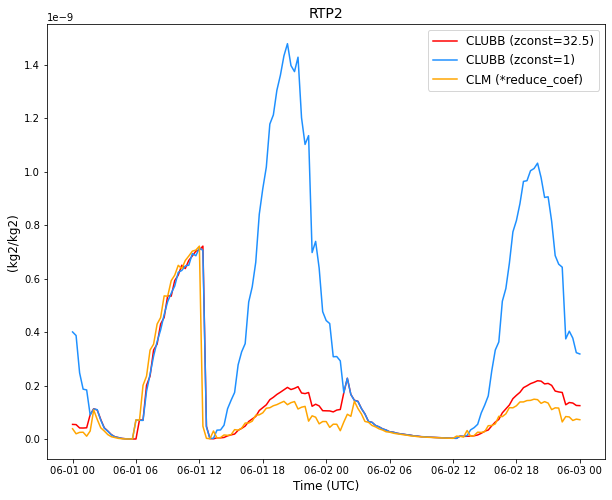

In [23]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

# ax1.plot(times[72::],np.squeeze((zconst32p5_camDS.RTP2_CLUBB.values))[72::,-1],'red',label='CLUBB (zconst=32.5)')
# ax1.plot(times[72::],np.squeeze((zconst1_camDS.RTP2_CLUBB.values))[72::,-1],'dodgerblue',label='CLUBB (zconst=1)')
ax1.plot(times[72::],np.squeeze((zconst32p5_camDS.RTP2_CLUBB.values)*1e-6)[72::,-1],'red',label='CLUBB (zconst=32.5)')
ax1.plot(times[72::],np.squeeze((zconst1_camDS.RTP2_CLUBB.values)*1e-6)[72::,-1],'dodgerblue',label='CLUBB (zconst=1)')
ax1.plot(times[72::],np.squeeze(zconst32p5_clmDS.QP2_CLUBB.values*reduce_coef)[72::],'orange',label='CLM (*reduce_coef)')
# ax1.plot(times[72::],np.squeeze(zconst1_clmDS.QP2_CLUBB.values)[72::],'green',label='CLM')


#ax1.plot(times,np.squeeze(zconst1_clmDS.THLP2_CLUBB.values),'orange',label='CLM')
ax1.legend(fontsize=12)
ax1.set_title('RTP2',fontsize=14)
ax1.set_ylabel('(kg2/kg2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)




## Additional details surrounding CLM formulation: what's difference between bare ground and tree patch? 
* First runs are without scm_iop_land_srf, and z_const = 1 (default)

In [6]:
## Read in history and log files (scm_iop_land_srf = .false.)
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/ZetaIssue/MoreOutput+SfcTypes/'

bareGround_camDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.noIOPlndSrf.MoreLogs.cam.h0.2015-05-31-00000.nc', decode_times=True)
bareGround_clmDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.noIOPlndSrf.MoreLogs.clm2.h0.2015-05-31-00000.nc', decode_times=True)

with open(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.noIOPlndSrf.MoreLogs_atmLog') as f:
    bareGround_atmLog = f.readlines()
with open(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.noIOPlndSrf.MoreLogs_lndLog') as f:
    bareGround_lndLog = f.readlines()

tree_camDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-TreeOnly.noIOPlndSrf.MoreLogs.cam.h0.2015-05-31-00000.nc', decode_times=True)
tree_clmDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-TreeOnly.noIOPlndSrf.MoreLogs.clm2.h0.2015-05-31-00000.nc', decode_times=True)

with open(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-TreeOnly.noIOPlndSrf.MoreLogs_atmLog') as f:
    tree_atmLog = f.readlines()
with open(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-TreeOnly.noIOPlndSrf.MoreLogs_lndLog') as f:
    tree_lndLog = f.readlines()
    
    
grass_camDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-C3grassOnly.noIOPlndSrf.MoreLogs.cam.h0.2015-05-31-00000.nc', decode_times=True)
grass_clmDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-C3grassOnly.noIOPlndSrf.MoreLogs.clm2.h0.2015-05-31-00000.nc', decode_times=True)

with open(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-C3grassOnly.noIOPlndSrf.MoreLogs_atmLog') as f:
    grass_atmLog = f.readlines()
with open(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-C3grassOnly.noIOPlndSrf.MoreLogs_lndLog') as f:
    grass_lndLog = f.readlines()

# Plust a test of a case where scm_iop_land_srf = .true.
#zconst32p5_camDS_landSrf = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst32_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf.cam.h0.2015-05-31-00000.nc', decode_times=True)



In [55]:
## Go through log files to pull out data not already saved out: 
## -------------------------------------------------------------

# First get where each output for a timestep ends

endTimeLines_lndBare = []
for iLines in range(len(bareGround_lndLog)):
    if bareGround_lndLog[iLines].startswith(' clm: completed timestep  ')==True:
        endTimeLines_lndBare = np.append(endTimeLines_lndBare,iLines)

endTimeLines_lndTree = []
for iLines in range(len(tree_lndLog)):
    if tree_lndLog[iLines].startswith(' clm: completed timestep  ')==True:
        endTimeLines_lndTree = np.append(endTimeLines_lndTree,iLines)

    
endTimeLines_lndGrass = []
for iLines in range(len(grass_lndLog)):
    if grass_lndLog[iLines].startswith(' clm: completed timestep  ')==True:
        endTimeLines_lndGrass = np.append(endTimeLines_lndGrass,iLines)
        
# Now get the last value of variables per time step:
# -------------------------------------------------

# Variables from BiogeophysPreFluxCalcs: 
z0mg_BiogeoPreFlux_bare = []
z0mg_BiogeoPreFlux_tree = []
z0mg_BiogeoPreFlux_grass = []
displa_BiogeoPreFlux_bare = []
displa_BiogeoPreFlux_tree = []
displa_BiogeoPreFlux_grass = []
htop_BiogeoPreFlux_bare  = []
htop_BiogeoPreFlux_tree  = []
htop_BiogeoPreFlux_grass  = []

# Variables from FrictionVel:
forc_hgt_u_g_bare  = []
forc_hgt_u_g_tree  = []
forc_hgt_u_g_grass = []
z0mg_c_bare  = []
z0mg_c_tree  = []
z0mg_c_grass = []
displ_p_bare  = []
displ_p_tree  = []
displ_p_grass = []
forc_hgt_u_p_FrictionVel_bare  = []
forc_hgt_u_p_FrictionVel_tree  = []
forc_hgt_u_p_FrictionVel_grass = []

# Variables from flux modules 
zeta_bare  = []
zeta_tree  = []
zeta_grass = []
zldis_bare  = []
zldis_tree  = []
zldis_grass = []
forc_hgt_u_p_FluxMod_bare  = []
forc_hgt_u_p_FluxMod_tree  = []
forc_hgt_u_p_FluxMod_grass = []
# displa_p_FluxMod_bare = []   # Not present in BareGroundFluxes 
displa_p_FluxMod_tree = []
displa_p_FluxMod_grass = []

# -----------------------------------------------------------------------------
timestepOffset = 30
for iTimeSel in range(len(endTimeLines_lndBare)-timestepOffset):
    iTimes = iTimeSel+timestepOffset
    
    if iTimes==0: 
        timestepSection_bare = bareGround_lndLog[0:int(endTimeLines_lndBare[iTimes])]
        timestepSection_tree = tree_lndLog[0:int(endTimeLines_lndTree[iTimes])]
        timestepSection_grass = grass_lndLog[0:int(endTimeLines_lndGrass[iTimes])]
        
    else:
        timestepSection_bare = bareGround_lndLog[int(endTimeLines_lndBare[iTimes-1]):int(endTimeLines_lndBare[iTimes])]
        timestepSection_tree = tree_lndLog[int(endTimeLines_lndTree[iTimes-1]):int(endTimeLines_lndTree[iTimes])]
        timestepSection_grass = grass_lndLog[int(endTimeLines_lndGrass[iTimes-1]):int(endTimeLines_lndGrass[iTimes])]


    ## Variables from BiogeophysPreFluxCalcs:
    ## --------------------------------------------------------------------------------------------------------------------------------------
    # z0mg
    lineBare_z0mg_BiogeoPreFlux = [item for item in timestepSection_bare if item.startswith(' MDF: (BiogeophysPreFluxCalcs) Value of z0m:')]
    strArr          = lineBare_z0mg_BiogeoPreFlux[-1].split(':')
    varBare         = strArr[2].split('\n')
    z0mg_BiogeoPreFlux_bare  = np.append(z0mg_BiogeoPreFlux_bare, float(varBare[0]))
    #
    lineTree_z0mg_BiogeoPreFlux = [item for item in timestepSection_tree if item.startswith(' MDF: (BiogeophysPreFluxCalcs) Value of z0m:')]
    strArr          = lineTree_z0mg_BiogeoPreFlux[-1].split(':')
    varTree         = strArr[2].split('\n')
    z0mg_BiogeoPreFlux_tree  = np.append(z0mg_BiogeoPreFlux_tree, float(varTree[0]))
    #
    lineGrass_z0mg_BiogeoPreFlux = [item for item in timestepSection_grass if item.startswith(' MDF: (BiogeophysPreFluxCalcs) Value of z0m:')]
    strArr          = lineGrass_z0mg_BiogeoPreFlux[-1].split(':')
    varGrass        = strArr[2].split('\n')
    z0mg_BiogeoPreFlux_grass  = np.append(z0mg_BiogeoPreFlux_grass, float(varGrass[0]))

    # displa
    lineBare_displa_BiogeoPreFlux = [item for item in timestepSection_bare if item.startswith(' MDF: (BiogeophysPreFluxCalcs) Value of displa:')]
    strArr          = lineBare_displa_BiogeoPreFlux[-1].split(':')
    varBare         = strArr[2].split('\n')
    displa_BiogeoPreFlux_bare  = np.append(displa_BiogeoPreFlux_bare, float(varBare[0]))
    #
    lineTree_displa_BiogeoPreFlux = [item for item in timestepSection_tree if item.startswith(' MDF: (BiogeophysPreFluxCalcs) Value of displa:')]
    strArr          = lineTree_displa_BiogeoPreFlux[-1].split(':')
    varTree         = strArr[2].split('\n')
    displa_BiogeoPreFlux_tree  = np.append(displa_BiogeoPreFlux_tree, float(varTree[0]))
    #
    lineGrass_displa_BiogeoPreFlux = [item for item in timestepSection_grass if item.startswith(' MDF: (BiogeophysPreFluxCalcs) Value of displa:')]
    strArr          = lineGrass_displa_BiogeoPreFlux[-1].split(':')
    varGrass        = strArr[2].split('\n')
    displa_BiogeoPreFlux_grass  = np.append(displa_BiogeoPreFlux_grass, float(varGrass[0]))

    # htop
    lineBare_htop_BiogeoPreFlux = [item for item in timestepSection_bare if item.startswith(' MDF: (BiogeophysPreFluxCalcs) Value of htop:')]
    strArr          = lineBare_htop_BiogeoPreFlux[-1].split(':')
    varBare         = strArr[2].split('\n')
    htop_BiogeoPreFlux_bare  = np.append(htop_BiogeoPreFlux_bare, float(varBare[0]))

    lineTree_htop_BiogeoPreFlux = [item for item in timestepSection_tree if item.startswith(' MDF: (BiogeophysPreFluxCalcs) Value of htop:')]
    strArr          = lineTree_htop_BiogeoPreFlux[-1].split(':')
    varTree         = strArr[2].split('\n')
    htop_BiogeoPreFlux_tree  = np.append(htop_BiogeoPreFlux_tree, float(varTree[0]))
    
    lineGrass_htop_BiogeoPreFlux = [item for item in timestepSection_grass if item.startswith(' MDF: (BiogeophysPreFluxCalcs) Value of htop:')]
    strArr          = lineGrass_htop_BiogeoPreFlux[-1].split(':')
    varGrass        = strArr[2].split('\n')
    htop_BiogeoPreFlux_grass  = np.append(htop_BiogeoPreFlux_grass, float(varGrass[0]))

    ## Variables from FrictionVel:
    ## --------------------------------------------------------------------------------------------------------------------------------------
    # forc_hgt_u(g)
    lineBare_forcHgtU_FrictionVel = [item for item in timestepSection_bare if item.startswith(' MDF: (FrictionVel) Value of forc_ht_u(g):')]
    strArr          = lineBare_forcHgtU_FrictionVel[-1].split(':')
    varBare         = strArr[2].split('\n')
    forc_hgt_u_g_bare  = np.append(forc_hgt_u_g_bare, float(varBare[0]))
    #
    lineTree_forcHgtU_FrictionVel = [item for item in timestepSection_tree if item.startswith(' MDF: (FrictionVel) Value of forc_ht_u(g):')]
    strArr          = lineTree_forcHgtU_FrictionVel[-1].split(':')
    varTree         = strArr[2].split('\n')
    forc_hgt_u_g_tree  = np.append(forc_hgt_u_g_tree, float(varTree[0]))
    #
    lineGrass_forcHgtU_FrictionVel = [item for item in timestepSection_grass if item.startswith(' MDF: (FrictionVel) Value of forc_ht_u(g):')]
    strArr          = lineGrass_forcHgtU_FrictionVel[-1].split(':')
    varGrass         = strArr[2].split('\n')
    forc_hgt_u_g_grass  = np.append(forc_hgt_u_g_grass, float(varGrass[0]))

    # z0mg
    lineBare_z0mg_FrictionVel = [item for item in timestepSection_bare if item.startswith(' MDF: (FrictionVel) Value of z0mg(c):')]
    strArr          = lineBare_z0mg_FrictionVel[-1].split(':')
    varBare         = strArr[2].split('\n')
    z0mg_c_bare     = np.append(z0mg_c_bare, float(varBare[0]))
    #
    lineTree_z0mg_FrictionVel = [item for item in timestepSection_tree if item.startswith(' MDF: (FrictionVel) Value of z0mg(c):')]
    strArr          = lineTree_z0mg_FrictionVel[-1].split(':')
    varTree         = strArr[2].split('\n')
    z0mg_c_tree     = np.append(z0mg_c_tree, float(varTree[0]))
    #
    lineGrass_z0mg_FrictionVel = [item for item in timestepSection_grass if item.startswith(' MDF: (FrictionVel) Value of z0mg(c):')]
    strArr          = lineGrass_z0mg_FrictionVel[-1].split(':')
    varGrass         = strArr[2].split('\n')
    z0mg_c_grass     = np.append(z0mg_c_grass, float(varGrass[0]))
    
    # displ
    lineBare_displ_FrictionVel = [item for item in timestepSection_bare if item.startswith(' MDF: (FrictionVel) Value of displa(p):')]
    strArr          = lineBare_displ_FrictionVel[-1].split(':')
    varBare         = strArr[2].split('\n')
    displ_p_bare     = np.append(displ_p_bare, float(varBare[0]))
    #
    lineTree_displ_FrictionVel = [item for item in timestepSection_tree if item.startswith(' MDF: (FrictionVel) Value of displa(p):')]
    strArr          = lineTree_displ_FrictionVel[-1].split(':')
    varTree         = strArr[2].split('\n')
    displ_p_tree    = np.append(displ_p_tree, float(varTree[0]))
    #
    lineGrass_displ_FrictionVel = [item for item in timestepSection_grass if item.startswith(' MDF: (FrictionVel) Value of displa(p):')]
    strArr          = lineGrass_displ_FrictionVel[-1].split(':')
    varGrass        = strArr[2].split('\n')
    displ_p_grass    = np.append(displ_p_grass, float(varGrass[0]))

#     # forc_hgt_u(p)
#     lineBare_forcHgtUp_FrictionVel = [item for item in timestepSection_bare if item.startswith(' MDF: (FrictionVel) Subsequent value of forc_hgt_u_patch(p):')]
#     strArr          = lineBare_forcHgtUp_FrictionVel[-1].split(':')
#     varBare         = strArr[2].split('\n')
#     forc_hgt_u_p_FrictionVel_bare  = np.append(forc_hgt_u_p_FrictionVel_bare, float(varBare[0]))
#     #
#     lineTree_forcHgtUp_FrictionVel = [item for item in timestepSection_tree if item.startswith(' MDF: (FrictionVel) Subsequent value of forc_hgt_u_patch(p):')]
#     strArr          = lineTree_forcHgtUp_FrictionVel[-1].split(':')
#     varTree         = strArr[2].split('\n')
#     forc_hgt_u_p_FrictionVel_tree  = np.append(forc_hgt_u_p_FrictionVel_tree, float(varTree[0]))



    ## Variables from Flux Files:
    ## --------------------------------------------------------------------------------------------------------------------------------------
    # displa
    lineTree_displa_FluxMod = [item for item in timestepSection_tree if item.startswith(' MDF:  (CanopyFlux)  Value of displa(p):')]
    strArr          = lineTree_displa_FluxMod[-1].split(':')
    varTree         = strArr[2].split('\n')
    displa_p_FluxMod_tree  = np.append(displa_p_FluxMod_tree, float(varTree[0]))
    #
    lineGrass_displa_FluxMod = [item for item in timestepSection_grass if item.startswith(' MDF:  (CanopyFlux)  Value of displa(p):')]
    strArr          = lineGrass_displa_FluxMod[-1].split(':')
    varGrass         = strArr[2].split('\n')
    displa_p_FluxMod_grass  = np.append(displa_p_FluxMod_grass, float(varGrass[0]))

    # forc_hgt_u_patch 
    lineBare_forcHgtU_FluxMod = [item for item in timestepSection_bare if item.startswith(' MDF:  (BareGround) Value of forc_hgt_u_patch:')]
    strArr          = lineBare_forcHgtU_FluxMod[-1].split(':')
    varBare         = strArr[2].split('\n')
    forc_hgt_u_p_FluxMod_bare  = np.append(forc_hgt_u_p_FluxMod_bare, float(varBare[0]))
    #
    lineTree_forcHgtU_FluxMod = [item for item in timestepSection_tree if item.startswith(' MDF:  (CanopyFlux)  Value of forc_hgt_u_patch:')]
    strArr          = lineTree_forcHgtU_FluxMod[-1].split(':')
    varTree         = strArr[2].split('\n')
    forc_hgt_u_p_FluxMod_tree  = np.append(forc_hgt_u_p_FluxMod_tree, float(varTree[0]))
    #
    lineGrass_forcHgtU_FluxMod = [item for item in timestepSection_grass if item.startswith(' MDF:  (CanopyFlux)  Value of forc_hgt_u_patch:')]
    strArr          = lineGrass_forcHgtU_FluxMod[-1].split(':')
    varGrass        = strArr[2].split('\n')
    forc_hgt_u_p_FluxMod_grass  = np.append(forc_hgt_u_p_FluxMod_grass, float(varGrass[0]))

    # zldis
    lineBare_zldis_FluxMod = [item for item in timestepSection_bare if item.startswith(' MDF:  (BareGround) Value of zldis (patch):')]
    strArr          = lineBare_zldis_FluxMod[-1].split(':')
    varBare         = strArr[2].split('\n')
    zldis_bare     = np.append(zldis_bare, float(varBare[0]))
    #
    lineTree_zldis_FluxMod = [item for item in timestepSection_tree if item.startswith(' MDF:  (CanopyFlux)  Value of zldis (patch):')]
    strArr          = lineTree_zldis_FluxMod[-1].split(':')
    varTree         = strArr[2].split('\n')
    zldis_tree    = np.append(zldis_tree, float(varTree[0]))
    #
    lineGrass_zldis_FluxMod = [item for item in timestepSection_grass if item.startswith(' MDF:  (CanopyFlux)  Value of zldis (patch):')]
    strArr          = lineGrass_zldis_FluxMod[-1].split(':')
    varGrass        = strArr[2].split('\n')
    zldis_grass    = np.append(zldis_grass, float(varGrass[0]))


    # zeta
    lineBare_zeta_FluxMod = [item for item in timestepSection_bare if item.startswith(' MDF:  (BareGround) Final (patch) value of zeta:')]
    strArr          = lineBare_zeta_FluxMod[-1].split(':')
    varBare         = strArr[2].split('\n')
    zeta_bare     = np.append(zeta_bare, float(varBare[0]))
    #
    lineTree_zeta_FluxMod = [item for item in timestepSection_tree if item.startswith(' MDF:  (CannopyFlux) Final (patch) value of zeta:')]
    strArr          = lineTree_zeta_FluxMod[-1].split(':')
    varTree         = strArr[2].split('\n')
    zeta_tree    = np.append(zeta_tree, float(varTree[0]))
    #
    lineGrass_zeta_FluxMod = [item for item in timestepSection_grass if item.startswith(' MDF:  (CannopyFlux) Final (patch) value of zeta:')]
    strArr          = lineGrass_zeta_FluxMod[-1].split(':')
    varGrass        = strArr[2].split('\n')
    zeta_grass    = np.append(zeta_grass, float(varGrass[0]))
    

In [7]:
## Go through log files to pull out data not already saved out: 
## -------------------------------------------------------------

# First get where each output for a timestep ends

endTimeLines_Tree = []
for iLines in range(len(tree_atmLog)):
    if tree_atmLog[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines_Tree = np.append(endTimeLines_Tree,iLines)
        
endTimeLines_grass = []
for iLines in range(len(grass_atmLog)):
    if grass_atmLog[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines_grass = np.append(endTimeLines_grass,iLines)

        
# Now get the last value of zeta and zldis in CAM and CLM files per timestep:
clubb_zeta_tree = []
clubb_zeta_grass = []

for iTimes in range(len(endTimeLines_Tree)):
    if iTimes==0: 
        timestepSection_tree  = tree_atmLog[0:int(endTimeLines_Tree[iTimes])]
        timestepSection_grass = grass_atmLog[0:int(endTimeLines_grass[iTimes])]
        
    else:
        timestepSection_tree  = tree_atmLog[int(endTimeLines_Tree[iTimes-1]):int(endTimeLines_Tree[iTimes])]
        timestepSection_grass = grass_atmLog[int(endTimeLines_grass[iTimes-1]):int(endTimeLines_grass[iTimes])]

    lineZeta_tree   = [item for item in timestepSection_tree if item.startswith(' MDF:   CLUBB Value of zeta  =')]
    strArr          = lineZeta_tree[-1].split('=')
    zetaTree        = strArr[1].split('\n')
    clubb_zeta_tree = np.append(clubb_zeta_tree, float(zetaTree[0]))

    lineZeta_grass  = [item for item in timestepSection_grass if item.startswith(' MDF:   CLUBB Value of zeta  =')]
    strArr          = lineZeta_grass[-1].split('=')
    zetaGrass           = strArr[1].split('\n')
    clubb_zeta_grass    = np.append(clubb_zeta_grass, float(zetaGrass[0]))


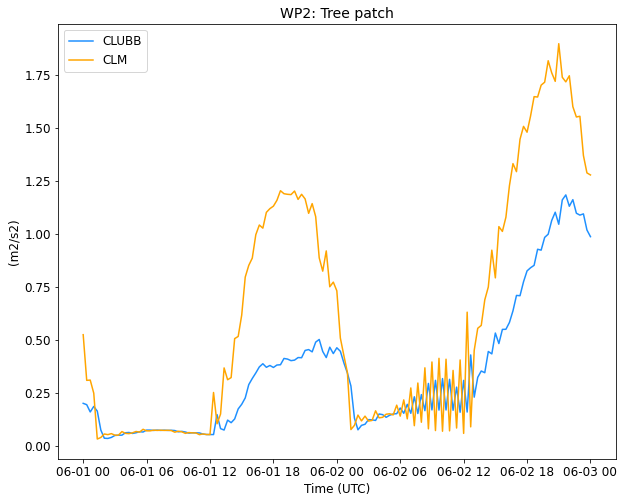

In [16]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))


#ax1.plot(times[72::],np.squeeze(zconst32p5_camDS.WP2_CLUBB.values)[72::,-1],'red',label='CLUBB (zconst = 32.5)')
ax1.plot(times[72::],np.squeeze(tree_camDS.WP2_CLUBB.values)[72::,-1],'dodgerblue',label='CLUBB')
ax1.plot(times[72::],np.squeeze(tree_clmDS.WP2_CLUBB.values)[72::],'orange',label='CLM')
# ax1.plot(times[72::],np.squeeze(zconst1_clmDS.WP2_CLUBB.values)[72::],'orange',label='CLM')

ax1.legend(fontsize=12)
ax1.set_title('WP2: Tree patch',fontsize=14)
ax1.set_ylabel('(m2/s2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)

ax1.tick_params(axis='both', which='major', labelsize=12)


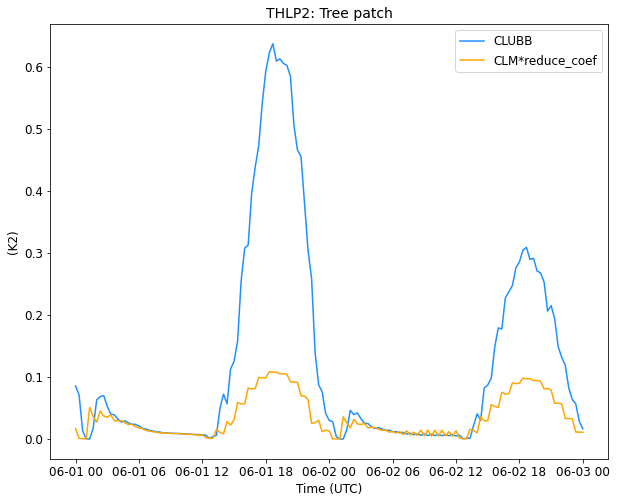

In [18]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))


#ax1.plot(times[72::],np.squeeze(zconst32p5_camDS.WP2_CLUBB.values)[72::,-1],'red',label='CLUBB (zconst = 32.5)')
ax1.plot(times[72::],np.squeeze(tree_camDS.THLP2_CLUBB.values)[72::,-1],'dodgerblue',label='CLUBB')
ax1.plot(times[72::],np.squeeze(tree_clmDS.THLP2_CLUBB.values*reduce_coef)[72::],'orange',label='CLM*reduce_coef')
# ax1.plot(times[72::],np.squeeze(zconst1_clmDS.WP2_CLUBB.values)[72::],'orange',label='CLM')

ax1.legend(fontsize=12)
ax1.set_title('THLP2: Tree patch',fontsize=14)
ax1.set_ylabel('(K2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)

ax1.tick_params(axis='both', which='major', labelsize=12)



Text(0.5, 0, 'Time (UTC)')

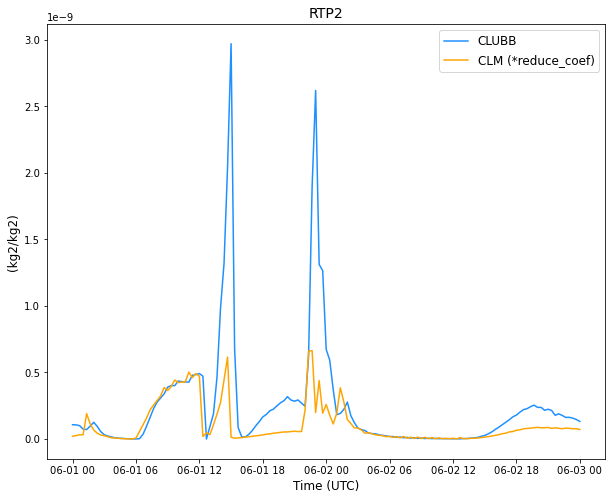

In [19]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

# ax1.plot(times[72::],np.squeeze((zconst32p5_camDS.RTP2_CLUBB.values))[72::,-1],'red',label='CLUBB (zconst=32.5)')
# ax1.plot(times[72::],np.squeeze((zconst1_camDS.RTP2_CLUBB.values))[72::,-1],'dodgerblue',label='CLUBB (zconst=1)')
#ax1.plot(times[72::],np.squeeze((zconst32p5_camDS.RTP2_CLUBB.values)*1e-6)[72::,-1],'red',label='CLUBB (zconst=32.5)')
ax1.plot(times[72::],np.squeeze((tree_camDS.RTP2_CLUBB.values)*1e-6)[72::,-1],'dodgerblue',label='CLUBB')
ax1.plot(times[72::],np.squeeze(tree_clmDS.QP2_CLUBB.values*reduce_coef)[72::],'orange',label='CLM (*reduce_coef)')
# ax1.plot(times[72::],np.squeeze(zconst1_clmDS.QP2_CLUBB.values)[72::],'green',label='CLM')


#ax1.plot(times,np.squeeze(zconst1_clmDS.THLP2_CLUBB.values),'orange',label='CLM')
ax1.legend(fontsize=12)
ax1.set_title('RTP2',fontsize=14)
ax1.set_ylabel('(kg2/kg2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)





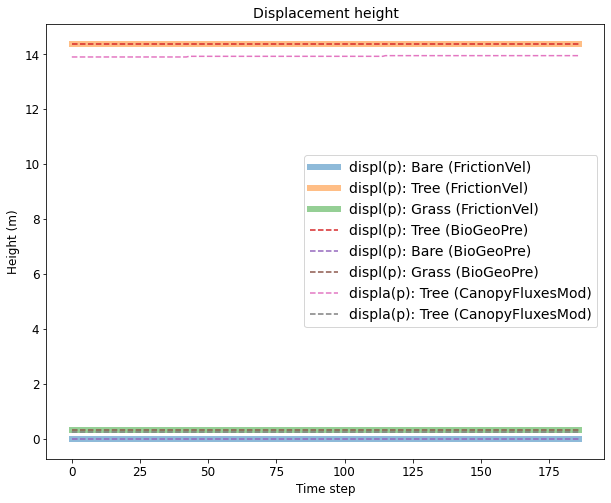

In [58]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))



ax1.plot(displ_p_bare,label='displ(p): Bare (FrictionVel)',linewidth=6,alpha=0.5)
ax1.plot(displ_p_tree,label='displ(p): Tree (FrictionVel)',linewidth=6,alpha=0.5)
ax1.plot(displ_p_grass,label='displ(p): Grass (FrictionVel)',linewidth=6,alpha=0.5)
ax1.plot(displa_BiogeoPreFlux_tree,'--',label='displ(p): Tree (BioGeoPre)')
ax1.plot(displa_BiogeoPreFlux_bare,'--',label='displ(p): Bare (BioGeoPre)')
ax1.plot(displa_BiogeoPreFlux_grass,'--',label='displ(p): Grass (BioGeoPre)')

ax1.plot(displa_p_FluxMod_tree,'--',label='displa(p): Tree (CanopyFluxesMod)')
ax1.plot(displa_p_FluxMod_grass,'--',label='displa(p): Tree (CanopyFluxesMod)')


ax1.legend(fontsize=14)
ax1.set_title('Displacement height',fontsize=14)
ax1.set_ylabel('Height (m)',fontsize=12)
ax1.set_xlabel('Time step',fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)


Text(0.5, 1.0, 'z0mg')

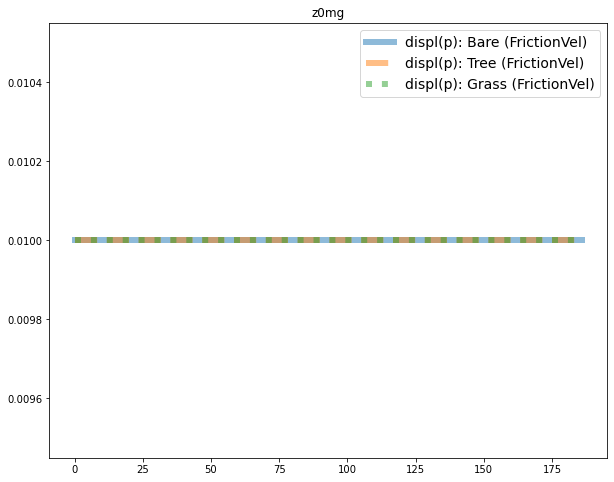

In [60]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(z0mg_c_bare,label='displ(p): Bare (FrictionVel)',linewidth=6,alpha=0.5)
ax1.plot(z0mg_c_tree,'--',label='displ(p): Tree (FrictionVel)',linewidth=6,alpha=0.5)
ax1.plot(z0mg_c_grass,':',label='displ(p): Grass (FrictionVel)',linewidth=6,alpha=0.5)
# ax1.plot(displa_BiogeoPreFlux_tree,'--',label='displ(p): Tree (BioGeoPre)')
# ax1.plot(displa_BiogeoPreFlux_bare,'--',label='displ(p): Bare (BioGeoPre)')

ax1.legend(fontsize=14)
ax1.set_title('z0mg')



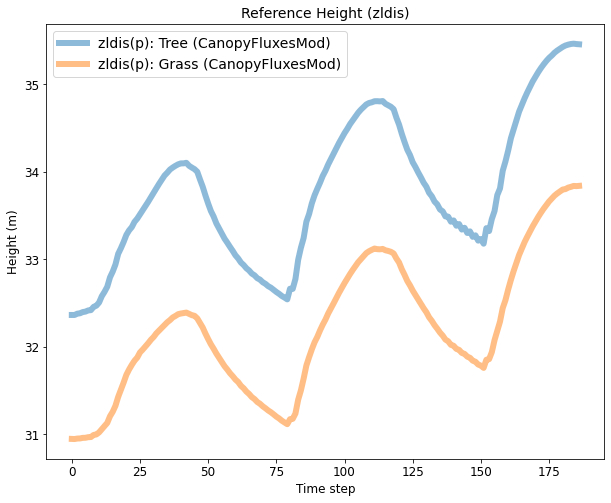

In [63]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

# ax1.plot(zldis_bare,label='zldis(p): Bare (BareGroundFluxesMod)',linewidth=6,alpha=0.5)
ax1.plot(zldis_tree,label='zldis(p): Tree (CanopyFluxesMod)',linewidth=6,alpha=0.5)
ax1.plot(zldis_grass,label='zldis(p): Grass (CanopyFluxesMod)',linewidth=6,alpha=0.5)
# ax1.plot(displa_BiogeoPreFlux_tree,'--',label='displ(p): Tree (BioGeoPre)')
# ax1.plot(displa_BiogeoPreFlux_bare,'--',label='displ(p): Bare (BioGeoPre)')

ax1.legend(fontsize=14)
ax1.set_title('Reference Height (zldis)',fontsize=14)
ax1.set_ylabel('Height (m)',fontsize=12)
ax1.set_xlabel('Time step',fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)


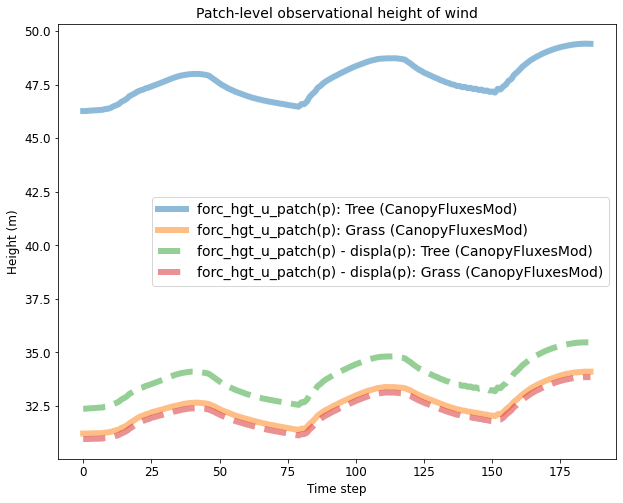

In [64]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

# ax1.plot(forc_hgt_u_p_FluxMod_bare,label='forc_hgt_u_patch(p): Bare (BareGroundFluxesMod)',linewidth=6,alpha=0.5)
ax1.plot(forc_hgt_u_p_FluxMod_tree,label='forc_hgt_u_patch(p): Tree (CanopyFluxesMod)',linewidth=6,alpha=0.5)
ax1.plot(forc_hgt_u_p_FluxMod_grass,label='forc_hgt_u_patch(p): Grass (CanopyFluxesMod)',linewidth=6,alpha=0.5)

ax1.plot(forc_hgt_u_p_FluxMod_tree-displa_p_FluxMod_tree,'--',label='forc_hgt_u_patch(p) - displa(p): Tree (CanopyFluxesMod)',linewidth=6,alpha=0.5)
ax1.plot(forc_hgt_u_p_FluxMod_grass-displa_p_FluxMod_grass,'--',label='forc_hgt_u_patch(p) - displa(p): Grass (CanopyFluxesMod)',linewidth=6,alpha=0.5)



ax1.legend(fontsize=14)
ax1.set_title('Patch-level observational height of wind',fontsize=14)
ax1.set_ylabel('Height (m)',fontsize=12)
ax1.set_xlabel('Time step',fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)



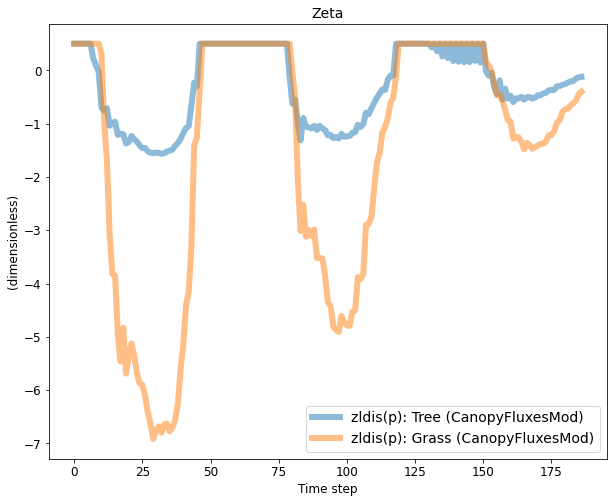

In [65]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

# ax1.plot(zldis_bare,label='zldis(p): Bare (BareGroundFluxesMod)',linewidth=6,alpha=0.5)
ax1.plot(zeta_tree,label='zldis(p): Tree (CanopyFluxesMod)',linewidth=6,alpha=0.5)
ax1.plot(zeta_grass,label='zldis(p): Grass (CanopyFluxesMod)',linewidth=6,alpha=0.5)
# ax1.plot(displa_BiogeoPreFlux_tree,'--',label='displ(p): Tree (BioGeoPre)')
# ax1.plot(displa_BiogeoPreFlux_bare,'--',label='displ(p): Bare (BioGeoPre)')

ax1.legend(fontsize=14)
ax1.set_title('Zeta',fontsize=14)
ax1.set_ylabel('(dimensionless)',fontsize=12)
ax1.set_xlabel('Time step',fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)



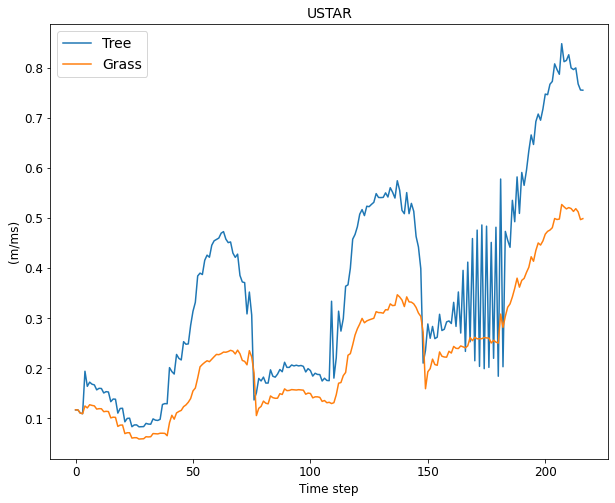

In [68]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

# ax1.plot(zldis_bare,label='zldis(p): Bare (BareGroundFluxesMod)',linewidth=6,alpha=0.5)
ax1.plot(np.squeeze(tree_clmDS.USTAR.values),label='Tree')
ax1.plot(np.squeeze(grass_clmDS.USTAR.values),label='Grass')
# ax1.plot(displa_BiogeoPreFlux_tree,'--',label='displ(p): Tree (BioGeoPre)')
# ax1.plot(displa_BiogeoPreFlux_bare,'--',label='displ(p): Bare (BioGeoPre)')

ax1.legend(fontsize=14)
ax1.set_title('USTAR',fontsize=14)
ax1.set_ylabel('(m/ms)',fontsize=12)
ax1.set_xlabel('Time step',fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)




### And what was causing the weird nocturnal differences in THLP2 between CLM and CLUBB when scm_iop_land_srf was true?

In [32]:
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/ZetaIssue/MoreOutput+SfcTypes/'

camFile_IOPlndSrf_onlyTgLWup = dataDir+'FSCAM.T42_T42.arm97.Zconst1_64levs.SrfMod-BareGroundOnly.testIOPlndSrf-onlyTgLWup.cam.h0.2015-05-31-00000.nc'
clmFile_IOPlndSrf_onlyTgLWup = dataDir+'FSCAM.T42_T42.arm97.Zconst1_64levs.SrfMod-BareGroundOnly.testIOPlndSrf-onlyTgLWup.clm2.h0.2015-05-31-00000.nc'

with xr.open_dataset(camFile_IOPlndSrf_onlyTgLWup, decode_times=True) as camDS_IOPlndSrf_onlyTgLWup: 
    camDS_IOPlndSrf_onlyTgLWup['time']  = camDS_IOPlndSrf_onlyTgLWup.indexes['time'].to_datetimeindex()
with xr.open_dataset(clmFile_IOPlndSrf_onlyTgLWup, decode_times=True) as clmDS_IOPlndSrf_onlyTgLWup: 
    clmDS_IOPlndSrf_onlyTgLWup['time']  = clmDS_IOPlndSrf_onlyTgLWup.indexes['time'].to_datetimeindex()
    
    
camFile_IOPlndSrf_onlyTgLWupLHSHflx = dataDir+'FSCAM.T42_T42.arm97.Zconst1_64levs.SrfMod-BareGroundOnly.testIOPlndSrf-onlyTgLWupLHSHflx.cam.h0.2015-05-31-00000.nc'
clmFile_IOPlndSrf_onlyTgLWupLHSHflx = dataDir+'FSCAM.T42_T42.arm97.Zconst1_64levs.SrfMod-BareGroundOnly.testIOPlndSrf-onlyTgLWupLHSHflx.clm2.h0.2015-05-31-00000.nc'

with xr.open_dataset(camFile_IOPlndSrf_onlyTgLWupLHSHflx, decode_times=True) as camDS_IOPlndSrf_onlyTgLWupLHSHflx: 
    camDS_IOPlndSrf_onlyTgLWupLHSHflx['time']  = camDS_IOPlndSrf_onlyTgLWupLHSHflx.indexes['time'].to_datetimeindex()
with xr.open_dataset(clmFile_IOPlndSrf_onlyTgLWupLHSHflx, decode_times=True) as clmDS_IOPlndSrf_onlyTgLWupLHSHflx: 
    clmDS_IOPlndSrf_onlyTgLWupLHSHflx['time']  = clmDS_IOPlndSrf_onlyTgLWupLHSHflx.indexes['time'].to_datetimeindex()

    
dataDir1 = '/Users/mdfowler/Documents/Analysis/CLASP/ZetaIssue/'
camFile_IOPlndSrf_all = dataDir1+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf.cam.h0.2015-05-31-00000.nc'
clmFile_IOPlndSrf_all = dataDir1+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf.clm2.h0.2015-05-31-00000.nc'

with xr.open_dataset(camFile_IOPlndSrf_all, decode_times=True) as camDS_IOPlndSrf_all: 
    camDS_IOPlndSrf_all['time']  = camDS_IOPlndSrf_all.indexes['time'].to_datetimeindex()
with xr.open_dataset(clmFile_IOPlndSrf_all, decode_times=True) as clmDS_IOPlndSrf_all: 
    clmDS_IOPlndSrf_all['time']  = clmDS_IOPlndSrf_all.indexes['time'].to_datetimeindex()



<ipython-input-32-e9c99196bdc8>:7: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  camDS_IOPlndSrf_onlyTgLWup['time']  = camDS_IOPlndSrf_onlyTgLWup.indexes['time'].to_datetimeindex()
<ipython-input-32-e9c99196bdc8>:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  clmDS_IOPlndSrf_onlyTgLWup['time']  = clmDS_IOPlndSrf_onlyTgLWup.indexes['time'].to_datetimeindex()
<ipython-input-32-e9c99196bdc8>:16: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This ma

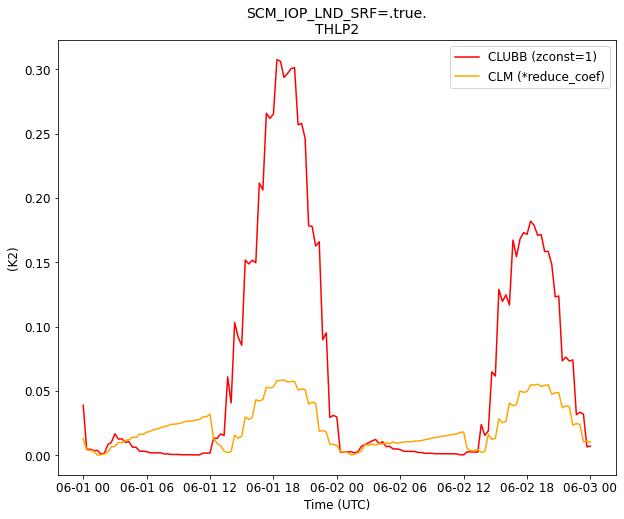

In [34]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times[72::],np.squeeze(camDS_IOPlndSrf_all.THLP2_CLUBB.values)[72::,-1],'red',label='CLUBB (zconst=1)')
ax1.plot(times[72::],np.squeeze(clmDS_IOPlndSrf_all.THLP2_CLUBB.values*reduce_coef)[72::],'orange',label='CLM (*reduce_coef)')

#ax1.plot(times,np.squeeze(zconst1_clmDS.THLP2_CLUBB.values),'orange',label='CLM')
ax1.legend(fontsize=12)
ax1.set_title('SCM_IOP_LND_SRF=.true.\nTHLP2',fontsize=14)
ax1.set_ylabel('(K2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)



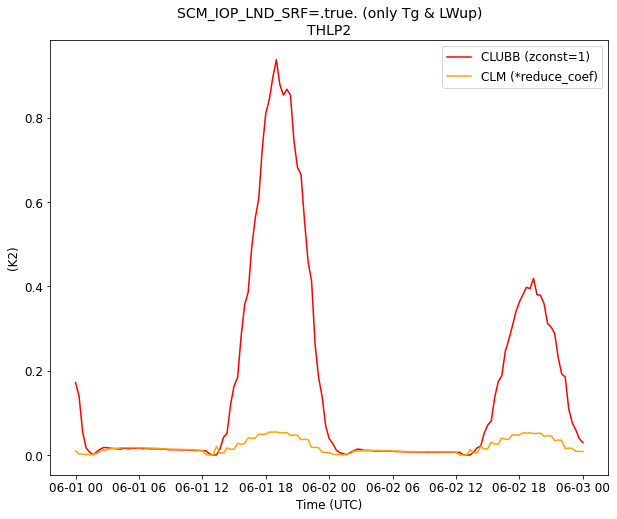

In [35]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times[72::],np.squeeze(camDS_IOPlndSrf_onlyTgLWup.THLP2_CLUBB.values)[72::,-1],'red',label='CLUBB (zconst=1)')
ax1.plot(times[72::],np.squeeze(clmDS_IOPlndSrf_onlyTgLWup.THLP2_CLUBB.values*reduce_coef)[72::],'orange',label='CLM (*reduce_coef)')

#ax1.plot(times,np.squeeze(zconst1_clmDS.THLP2_CLUBB.values),'orange',label='CLM')
ax1.legend(fontsize=12)
ax1.set_title('SCM_IOP_LND_SRF=.true. (only Tg & LWup)\nTHLP2',fontsize=14)
ax1.set_ylabel('(K2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)




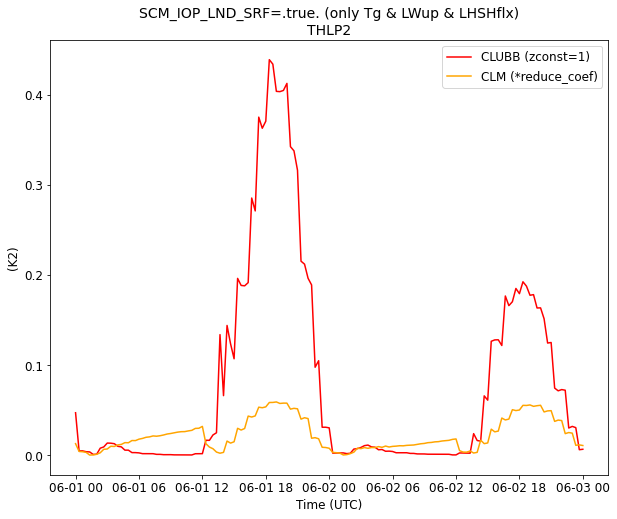

In [36]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times[72::],np.squeeze(camDS_IOPlndSrf_onlyTgLWupLHSHflx.THLP2_CLUBB.values)[72::,-1],'red',label='CLUBB (zconst=1)')
ax1.plot(times[72::],np.squeeze(clmDS_IOPlndSrf_onlyTgLWupLHSHflx.THLP2_CLUBB.values*reduce_coef)[72::],'orange',label='CLM (*reduce_coef)')

#ax1.plot(times,np.squeeze(zconst1_clmDS.THLP2_CLUBB.values),'orange',label='CLM')
ax1.legend(fontsize=12)
ax1.set_title('SCM_IOP_LND_SRF=.true. (only Tg & LWup & LHSHflx)\nTHLP2',fontsize=14)
ax1.set_ylabel('(K2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)





### What about Vince's updates to CLUBB, using l_vary_convect_depth?

In [28]:
## Read in history and log files (scm_iop_land_srf = .false.)
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/ZetaIssue/'

# zconst32p5_camDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst32p5_useAndre-64levs.SrfMod-BareGroundOnly.cam.h0.2015-05-31-00000.nc', decode_times=True)
# zconst32p5_clmDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst32p5_useAndre-64levs.SrfMod-BareGroundOnly.clm2.h0.2015-05-31-00000.nc', decode_times=True)

# with open(dataDir+'FSCAM.T42_T42.arm97.Zconst32p5_useAndre-64levs.SrfMod-BareGroundOnly_atmLog') as f:
#     zconst32p5_atmLog = f.readlines()
# with open(dataDir+'FSCAM.T42_T42.arm97.Zconst32p5_useAndre-64levs.SrfMod-BareGroundOnly_lndLog') as f:
#     zconst32p5_lndLog = f.readlines()

# zconst1_camDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.cam.h0.2015-05-31-00000.nc', decode_times=True)
# zconst1_clmDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.clm2.h0.2015-05-31-00000.nc', decode_times=True)

# with open(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnl_atmLog') as f:
#     zconst1_atmLog = f.readlines()
# with open(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnl_lndLog') as f:
#     zconst1_lndLog = f.readlines()

# Set l_vary_convect_depth = .true.
varyConvect_camDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_64levs.SrfMod-BareGroundOnly.testCLUBB-lVaryConvect.iopLndSrfOff.cam.h0.2015-05-31-00000.nc')
varyConvect_clmDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_64levs.SrfMod-BareGroundOnly.testCLUBB-lVaryConvect.iopLndSrfOff.clm2.h0.2015-05-31-00000.nc')

with open(dataDir+'FSCAM.T42_T42.arm97.Zconst1_64levs.SrfMod-BareGroundOnly.testCLUBB-lVaryConvect.iopLndSrfOff_atmLog') as f:
    varyConvect_atmLog = f.readlines()

# Set z_const to be zbot
zbot_camDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_64levs.SrfMod-BareGroundOnly.testCLUBB-zconst_eq_zbot.cam.h0.2015-05-31-00000.nc')
zbot_clmDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_64levs.SrfMod-BareGroundOnly.testCLUBB-zconst_eq_zbot.clm2.h0.2015-05-31-00000.nc')


    

Won't be able to compare zeta now, because zeta is only present in the Andre equations version and not in the l_vary_convect_depth version of surface_varnce. But can still see what's being used for ustar (seems to be called uf, now) and what depth is being used.

In [7]:
## Go through log files to pull out data not already saved out: 
## -------------------------------------------------------------

# First get where each output for a timestep ends
    
endTimeLines_atmVaryConvect = []
for iLines in range(len(varyConvect_atmLog)):
    if varyConvect_atmLog[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines_atmVaryConvect = np.append(endTimeLines_atmVaryConvect,iLines)
        
# Now get the last value of zeta and zldis in CAM and CLM files per timestep:
clubb_depth_varyConvect  = []
clubb_uf_varyConvect     = []

for iTimes in range(len(endTimeLines_atm1)):
    if iTimes==0: 
        timestepSection_atmVaryConvect  = varyConvect_atmLog[0:int(endTimeLines_atmVaryConvect[iTimes])]        
    else:
        timestepSection_atmVaryConvect    = varyConvect_atmLog[int(endTimeLines_atmVaryConvect[iTimes-1]):int(endTimeLines_atmVaryConvect[iTimes])]

    lineDepth_varConvect    = [item for item in timestepSection_atmVaryConvect if item.startswith(' MDF:  Value of depth_pos_wpthlp =')]
    strArr                  = lineDepth_varConvect[-1].split('=')
    depthVary               = strArr[1].split('\n')
    clubb_depth_varyConvect = np.append(clubb_depth_varyConvect, float(depthVary[0]))
    
    lineUf_varConvect    = [item for item in timestepSection_atmVaryConvect if item.startswith(' MDF:  Value of uf (seems to replace u*) =')]
    strArr               = lineUf_varConvect[-1].split('=')
    ufVary               = strArr[1].split('\n')
    clubb_uf_varyConvect = np.append(clubb_uf_varyConvect, float(ufVary[0]))

 

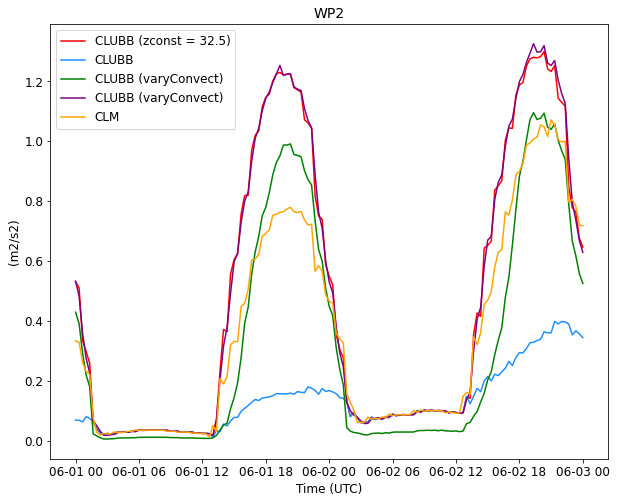

In [29]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times[72::],np.squeeze(zconst32p5_camDS.WP2_CLUBB.values)[72::,-1],'red',label='CLUBB (zconst = 32.5)')
ax1.plot(times[72::],np.squeeze(zconst1_camDS.WP2_CLUBB.values)[72::,-1],'dodgerblue',label='CLUBB')
ax1.plot(times[72::],np.squeeze(varyConvect_camDS.WP2_CLUBB.values)[72::,-1],'green',label='CLUBB (varyConvect)')
ax1.plot(times[72::],np.squeeze(zbot_camDS.WP2_CLUBB.values)[72::,-1],'purple',label='CLUBB (zconst=zbot)')
ax1.plot(times[72::],np.squeeze(zconst32p5_clmDS.WP2_CLUBB.values)[72::],'orange',label='CLM')
# ax1.plot(times[72::],np.squeeze(zconst1_clmDS.WP2_CLUBB.values)[72::],'orange',label='CLM')

ax1.legend(fontsize=12)
ax1.set_title('WP2',fontsize=14)
ax1.set_ylabel('(m2/s2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)

ax1.tick_params(axis='both', which='major', labelsize=12)



In [24]:
reduce_coef=0.2

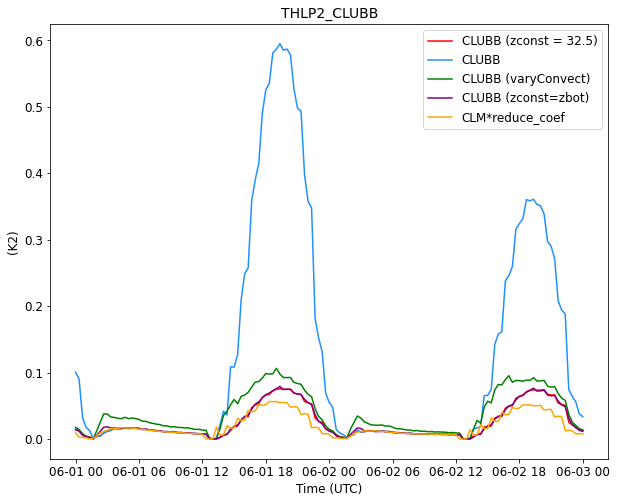

In [30]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times[72::],np.squeeze(zconst32p5_camDS.THLP2_CLUBB.values)[72::,-1],'red',label='CLUBB (zconst = 32.5)')
ax1.plot(times[72::],np.squeeze(zconst1_camDS.THLP2_CLUBB.values)[72::,-1],'dodgerblue',label='CLUBB')
ax1.plot(times[72::],np.squeeze(varyConvect_camDS.THLP2_CLUBB.values)[72::,-1],'green',label='CLUBB (varyConvect)')
ax1.plot(times[72::],np.squeeze(zbot_camDS.THLP2_CLUBB.values)[72::,-1],'purple',label='CLUBB (zconst=zbot)')

ax1.plot(times[72::],np.squeeze(zconst32p5_clmDS.THLP2_CLUBB.values)[72::]*reduce_coef,'orange',label='CLM*reduce_coef')
# ax1.plot(times[72::],np.squeeze(zconst1_clmDS.WP2_CLUBB.values)[72::],'orange',label='CLM')

ax1.legend(fontsize=12)
ax1.set_title('THLP2_CLUBB',fontsize=14)
ax1.set_ylabel('(K2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)

ax1.tick_params(axis='both', which='major', labelsize=12)



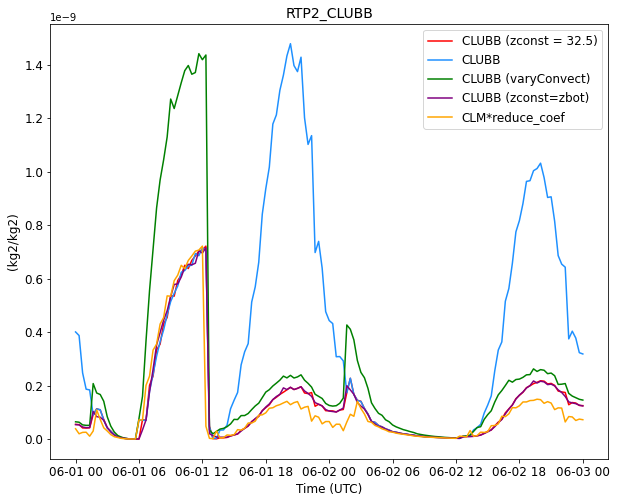

In [31]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times[72::],np.squeeze(zconst32p5_camDS.RTP2_CLUBB.values)[72::,-1]*(1e-6),'red',label='CLUBB (zconst = 32.5)')
ax1.plot(times[72::],np.squeeze(zconst1_camDS.RTP2_CLUBB.values)[72::,-1]*(1e-6),'dodgerblue',label='CLUBB')
ax1.plot(times[72::],np.squeeze(varyConvect_camDS.RTP2_CLUBB.values)[72::,-1]*(1e-6),'green',label='CLUBB (varyConvect)')
ax1.plot(times[72::],np.squeeze(zbot_camDS.RTP2_CLUBB.values)[72::,-1]*(1e-6),'purple',label='CLUBB (zconst=zbot)')
ax1.plot(times[72::],np.squeeze(zconst32p5_clmDS.QP2_CLUBB.values)[72::]*reduce_coef,'orange',label='CLM*reduce_coef')
# ax1.plot(times[72::],np.squeeze(zconst1_clmDS.WP2_CLUBB.values)[72::],'orange',label='CLM')

ax1.legend(fontsize=12)
ax1.set_title('RTP2_CLUBB',fontsize=14)
ax1.set_ylabel('(kg2/kg2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)

ax1.tick_params(axis='both', which='major', labelsize=12)


### I have some lingering questions... Why is wp2 not *more* similar? When we tested this before, wp2 was almost identical. 
One difference is that on past runs, I had been setting scm_iop_land_srf=.true. <br>
I stopped that this time because that setting ensures the exact same surface fluxes, temperatures, etc. are used based on the forcing file. But having plotted those out below, they seem pretty identical anyway. So is there something *else* in that setting that's creating stronger agreement? <br>
I also ran the original tests on izumi, and these new ones on Hobart. That shouldn't matter at all, but does it? 

In [131]:
zconst32p5_camDS_landSrf = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst32_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf.cam.h0.2015-05-31-00000.nc', decode_times=True)


Text(0.5, 0, 'Time (UTC)')

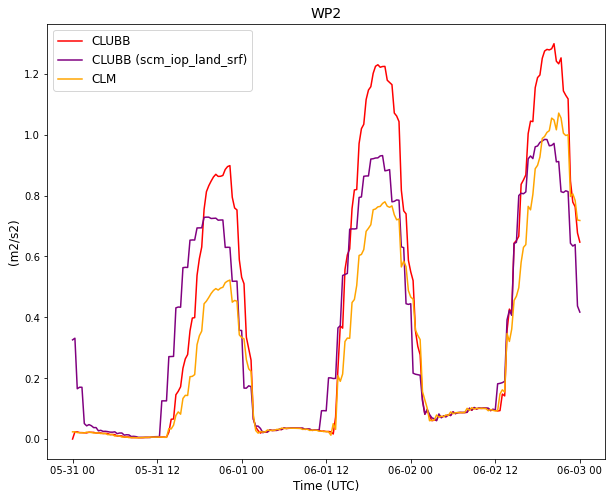

In [132]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times,np.squeeze(zconst32p5_camDS.WP2_CLUBB.values)[:,-1],'red',label='CLUBB')
ax1.plot(times,np.squeeze(zconst32p5_camDS_landSrf.WP2_CLUBB.values)[:,-1],'purple',label='CLUBB (scm_iop_land_srf)')
ax1.plot(times,np.squeeze(zconst32p5_clmDS.WP2_CLUBB.values),'orange',label='CLM')

#ax1.plot(times,np.squeeze(zconst1_clmDS.WP2_CLUBB.values),'orange',label='CLM')
ax1.legend(fontsize=12)
ax1.set_title('WP2',fontsize=14)
ax1.set_ylabel('(m2/s2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)




**Plots of things I think are controlled by scm_iop_land_srf**

Text(0.5, 0, 'Time (UTC)')

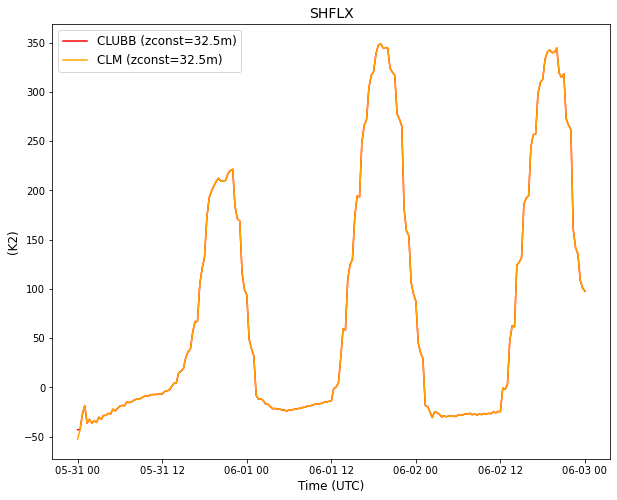

In [129]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times,np.squeeze(zconst32p5_camDS.SHFLX.values),'red',label='CLUBB (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_camDS.SHFLX.values),'dodgerblue',label='CLUBB (zconst=1m)')
ax1.plot(times,np.squeeze(zconst32p5_clmDS.FSH_TO_COUPLER.values),'orange',label='CLM (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_clmDS.FSH_TO_COUPLER.values),'green',label='CLM (zconst=1m)')

ax1.legend(fontsize=12)
ax1.set_title('SHFLX',fontsize=14)
ax1.set_ylabel('(K2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)


Text(0.5, 0, 'Time (UTC)')

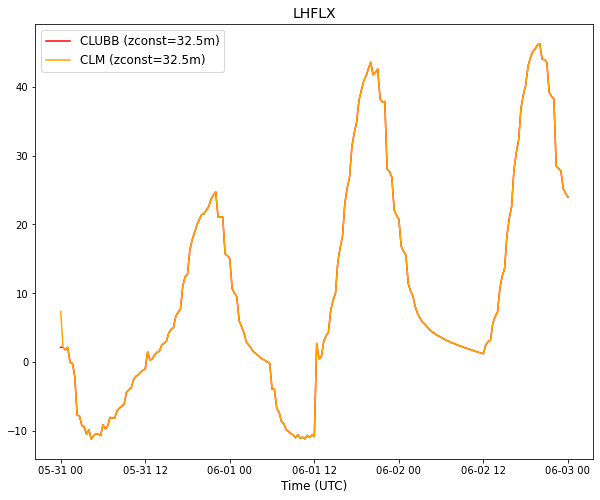

In [128]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times,np.squeeze(zconst32p5_camDS.LHFLX.values),'red',label='CLUBB (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_camDS.LHFLX.values),'dodgerblue',label='CLUBB (zconst=1m)')
ax1.plot(times,np.squeeze(zconst32p5_clmDS.EFLX_LH_TOT.values),'orange',label='CLM (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_clmDS.EFLX_LH_TOT.values),'green',label='CLM (zconst=1m)')

ax1.legend(fontsize=12)
ax1.set_title('LHFLX',fontsize=14)
ax1.set_xlabel('Time (UTC)',fontsize=12)


Text(0.5, 0, 'Time (UTC)')

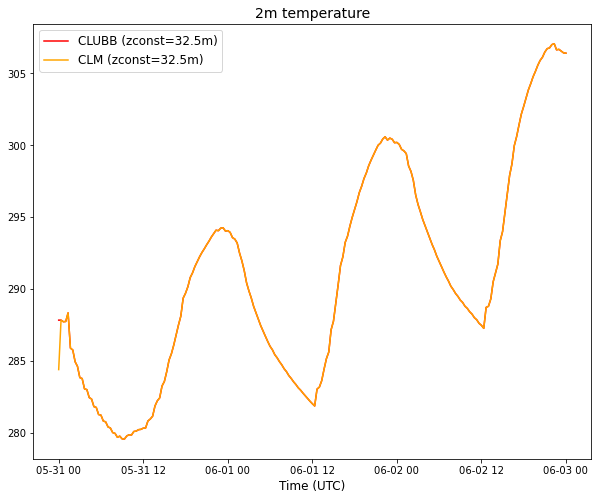

In [127]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times,np.squeeze(zconst32p5_camDS.TREFHT.values),'red',label='CLUBB (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_camDS.TREFHT.values),'dodgerblue',label='CLUBB (zconst=1m)')
ax1.plot(times,np.squeeze(zconst32p5_clmDS.TSA.values),'orange',label='CLM (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_clmDS.TSA.values),'green',label='CLM (zconst=1m)')

ax1.legend(fontsize=12)
ax1.set_title('2m temperature',fontsize=14)
ax1.set_xlabel('Time (UTC)',fontsize=12)


Text(0.5, 0, 'Time (UTC)')

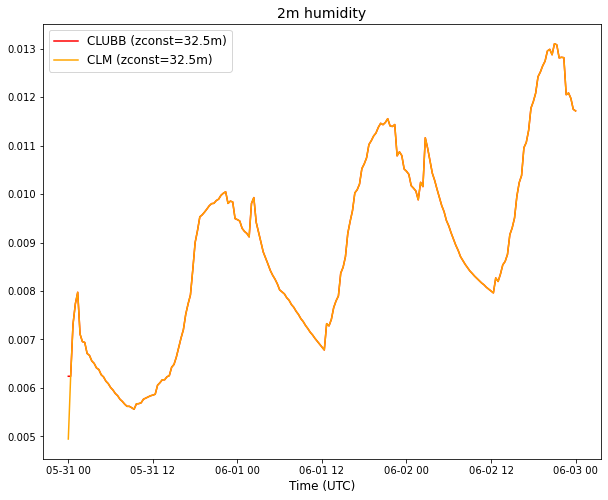

In [126]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times,np.squeeze(zconst32p5_camDS.QREFHT.values),'red',label='CLUBB (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_camDS.QREFHT.values),'dodgerblue',label='CLUBB (zconst=1m)')
ax1.plot(times,np.squeeze(zconst32p5_clmDS.Q2M.values),'orange',label='CLM (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_clmDS.Q2M.values),'green',label='CLM (zconst=1m)')

ax1.legend(fontsize=12)
ax1.set_title('2m humidity',fontsize=14)
ax1.set_xlabel('Time (UTC)',fontsize=12)



Text(0.5, 0, 'Time (UTC)')

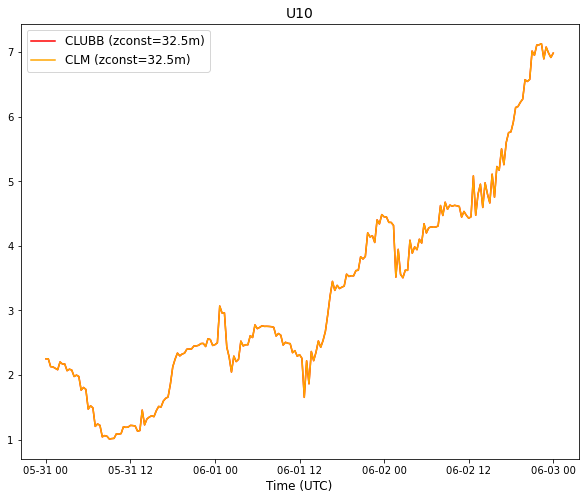

In [125]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times,np.squeeze(zconst32p5_camDS.U10.values),'red',label='CLUBB (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_camDS.U10.values),'dodgerblue',label='CLUBB (zconst=1m)')
ax1.plot(times,np.squeeze(zconst32p5_clmDS.U10.values),'orange',label='CLM (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_clmDS.U10.values),'green',label='CLM (zconst=1m)')

ax1.legend(fontsize=12)
ax1.set_title('U10',fontsize=14)
ax1.set_xlabel('Time (UTC)',fontsize=12)


